In [1]:
from pandas import read_csv
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into (X) and output (y) varriables
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

In [3]:
# faeture selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [4]:
# load the datset
X, y = load_dataset('diabetes.csv')

In [5]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [6]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [7]:
# what are scors for the features
for i in range(len(fs.scores_)):
    print('FEATURES %d: %f' % (i, fs.scores_[i]))

FEATURES 0: 0.023507
FEATURES 1: 0.110930
FEATURES 2: 0.000000
FEATURES 3: 0.031033
FEATURES 4: 0.059390
FEATURES 5: 0.050507
FEATURES 6: 0.011894
FEATURES 7: 0.075070


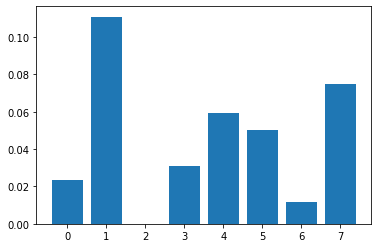

In [8]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()